In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [ ]:
df = pd.read_csv('Mall_Customers.csv') 


In [ ]:

features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

print(features.isnull().sum())


Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(scaled_features)


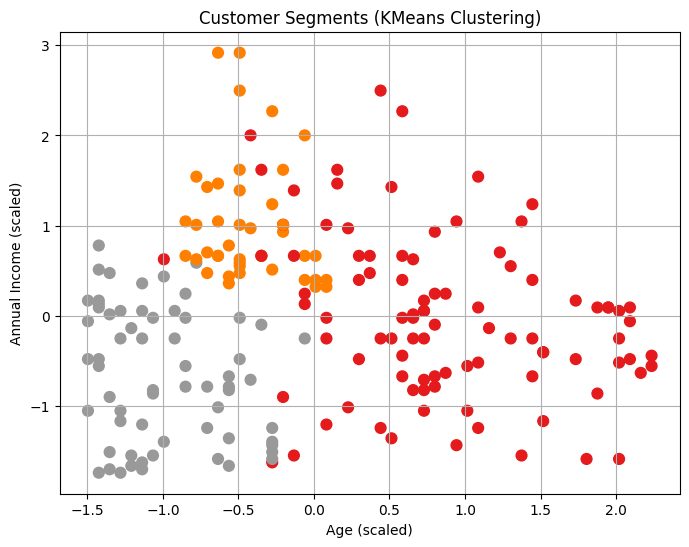

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=labels, cmap='Set1', s=60)
plt.xlabel('Age (scaled)')
plt.ylabel('Annual Income (scaled)')
plt.title('Customer Segments (KMeans Clustering)')
plt.grid(True)
plt.show()


In [8]:
score = silhouette_score(scaled_features, labels)
print(f"Silhouette Score (k=3): {score:.2f}")


Silhouette Score (k=3): 0.36


In [9]:
for k in range(2, 6):
    km = KMeans(n_clusters=k, random_state=42)
    lbl = km.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, lbl)
    print(f"k={k} → Silhouette Score: {score:.2f}")


k=2 → Silhouette Score: 0.34
k=3 → Silhouette Score: 0.36
k=4 → Silhouette Score: 0.40
k=5 → Silhouette Score: 0.41
